## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
plt.style.use('seaborn')

In [2]:
wine = datasets.load_wine()
boston = datasets.load_boston()
breast_cancer = datasets.load_breast_cancer()

### Use wine dataset

In [3]:
wine # 先點開來看一下有什麼東西，從'target'值發現這個資料集的目標應該是做酒的分類

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
wine.feature_names # 看看有哪些特徵

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
# 把資料集弄成 dataframe 的形式，比較好看
data = pd.DataFrame(wine.data, columns = wine.feature_names)
data['class'] = wine.target
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
data.info() # 檢查一下特徵的資料型態以及是否有缺值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [7]:
data.describe() # 看看個特徵的五值

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


### Model Training
> 使用 Logistic Regression Model

In [8]:
MMEncoder = MinMaxScaler() # 將資料做特徵縮放，幫助模型結果收斂

features = data.columns[:13] # 將特徵挑選出來

data[features] = MMEncoder.fit_transform(data[features]) # 對特徵進行特徵縮放

x_train, x_test, y_train, y_test = train_test_split(data[features], data['class']) # 切割訓練、測試資料集

logreg = linear_model.LogisticRegression() # 宣告邏輯回歸模型
logreg.fit(x_train, y_train)    # fit model
y_pred = logreg.predict(x_test) # predict

In [9]:
print(f'prediction accuracy: {accuracy_score(y_pred, y_test)}')

prediction accuracy: 1.0


#### Visualization

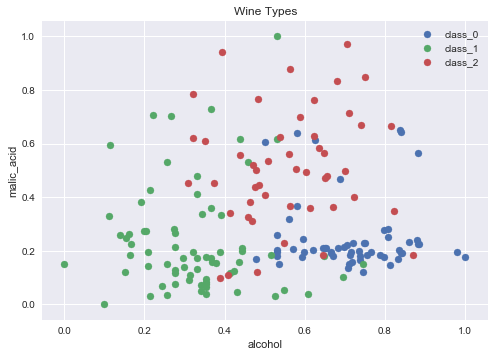

In [10]:
wine_types = [0, 1, 2]

# Pick the wine parameters for consideration.
x_axis = 'alcohol'
y_axis = 'malic_acid'

# Plot the scatter for every type of Iris.
for wine_type in wine_types:
    plt.scatter(
        data[x_axis][data['class'] == wine_type],
        data[y_axis][data['class'] == wine_type],
        label=wine_type
    )

# Plot the data.    
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('Wine Types')
plt.legend(wine.target_names)
plt.show()

In [11]:
# train with alcohol and malic_acid (first two features)
logistic = linear_model.LogisticRegression()
logistic.fit(x_train.iloc[:, :2], y_train)
print(f'train accuracy: {logistic.score(x_train.iloc[:, :2], y_train)}')
print(f'prediction accuracy: {logistic.score(x_test.iloc[:, :2], y_test)}')

train accuracy: 0.7744360902255639
prediction accuracy: 0.7333333333333333


#### Draw dicision boundary [plt.contour](https://matplotlib.org/3.2.2/gallery/images_contours_and_fields/contour_demo.html#sphx-glr-gallery-images-contours-and-fields-contour-demo-py)

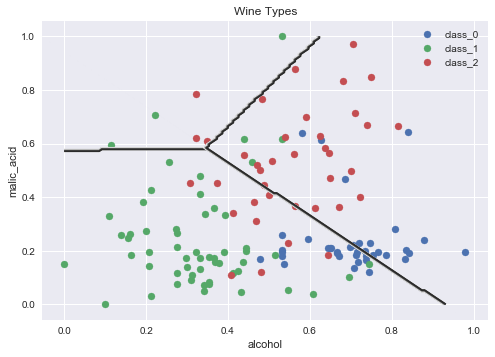

In [12]:
num_examples = x_train.shape[0]

# Set up how many calculations we want to do along every axis. 
samples = 150

# Generate test ranges for x and y axis.
x_min = np.min(x_train.iloc[:, 0]) # alcohol
x_max = np.max(x_train.iloc[:, 0]) # alcohol

y_min = np.min(x_train.iloc[:, 1]) # malic_acid
y_max = np.max(x_train.iloc[:, 1]) # malic_acid

X = np.linspace(x_min, x_max, samples)
Y = np.linspace(y_min, y_max, samples)

# z axis will contain our predictions. So let's get predictions for every pair of x and y.
Z_class_0 = np.zeros((samples, samples))
Z_class_1 = np.zeros((samples, samples))
Z_class_2 = np.zeros((samples, samples))

for x_index, x in enumerate(X):
    for y_index, y in enumerate(Y):
        data = np.array([[x, y]])
        prediction = logistic.predict(data)[0]
        if prediction == 0:
            Z_class_0[x_index][y_index] = 1
        elif prediction == 1:
            Z_class_1[x_index][y_index] = 1
        elif prediction == 2:
            Z_class_2[x_index][y_index] = 1

# Now, when we have x, y and z axes being setup and calculated we may print decision boundaries.
for wine_type in wine_types:
    plt.scatter(
        x_train.loc[(y_train == wine_type), 'alcohol'],
        x_train.loc[(y_train == wine_type), 'malic_acid'],
        label=wine_type
    )

plt.contour(X, Y, Z_class_0)
plt.contour(X, Y, Z_class_1)
plt.contour(X, Y, Z_class_2)
    
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('Wine Types')
plt.legend(wine.target_names)
plt.show()